In [50]:
import numpy as np 
import pandas as pd

In [51]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [52]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 1. DATA CLEANING

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [54]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [55]:
df.rename(columns = {'v1':'target','v2':'text'},inplace=True)

In [56]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target']=encoder.fit_transform(df['target'])

In [57]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [58]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [59]:
df.duplicated().sum()

np.int64(403)

In [60]:

df.drop_duplicates(keep='first',inplace=True)

# 2. EDA

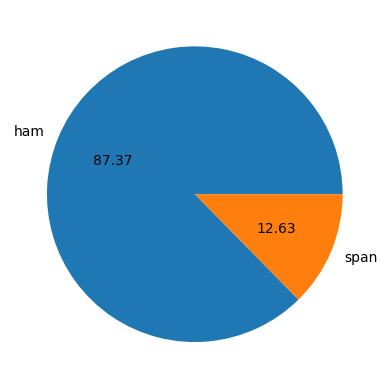

In [61]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','span'],autopct='%0.2f')
plt.show()


In [62]:
import nltk


In [63]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
df['char_count'] = df['text'].apply(len)

In [65]:
#tokenization of words
df['word_count']=df['text'].apply(lambda x:nltk.word_tokenize(x)).apply(len)

In [66]:
df['sent_count']=df['text'].apply(lambda x:nltk.sent_tokenize(x)).apply(len)

In [67]:
df.describe()

,target,char_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [68]:
df[df['target']== 0 ][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [69]:
df[df['target']== 1 ][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [70]:
import seaborn as sns

<Axes: xlabel='char_count', ylabel='Count'>

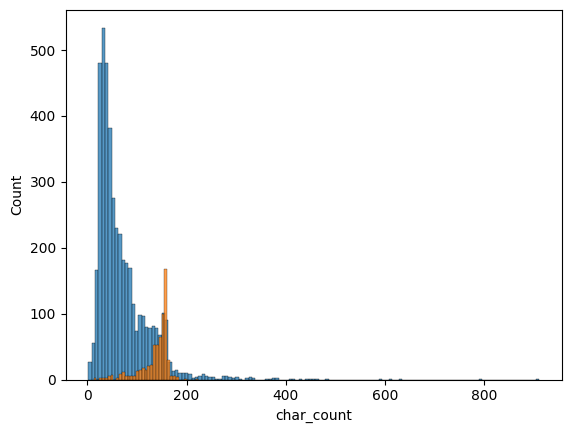

In [71]:
sns.histplot(df[df['target']==0]['char_count'])
sns.histplot(df[df['target']==1]['char_count'])

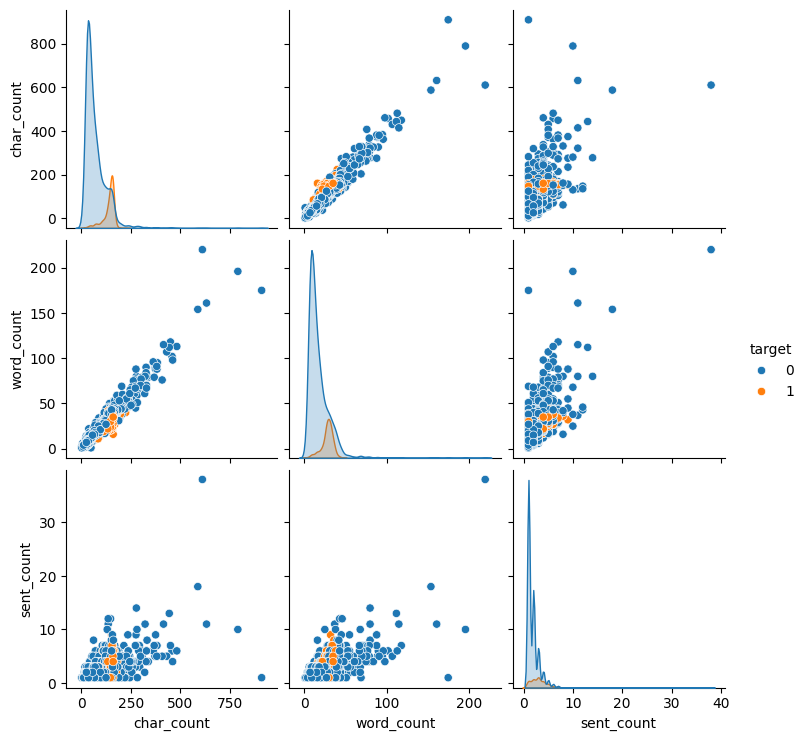

In [72]:
sns.pairplot(df,hue='target')

<Axes: >

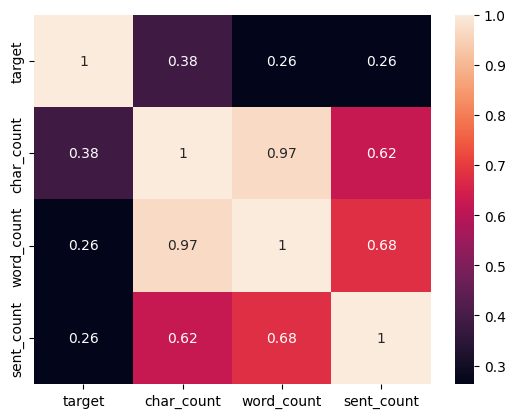

In [73]:
sns.heatmap(df.drop(['text'], axis=1).corr(),annot=True)

# 3.Data preprocessing

### 1.lowercase
---
### 2.tokenization
---

### 3.remove special letters
---
### 4.stopwords and puntuation
---
### 5.steming
---


In [74]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
def text_trans(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]

    for i in text:
        if i.isalpha():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        ps = PorterStemmer()
        y.append(ps.stem(i))

    return " ".join(y)

In [75]:
df['transformed_text'] =df['text'].apply(text_trans)

In [76]:
df

,target,text,char_count,word_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,time tri contact u pound prize claim easi call...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [77]:
from sympy import false
from wordcloud import WordCloud

wc = WordCloud(collocations=false,width=500,height=500,min_font_size=10,background_color='white')

In [78]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep =" "))

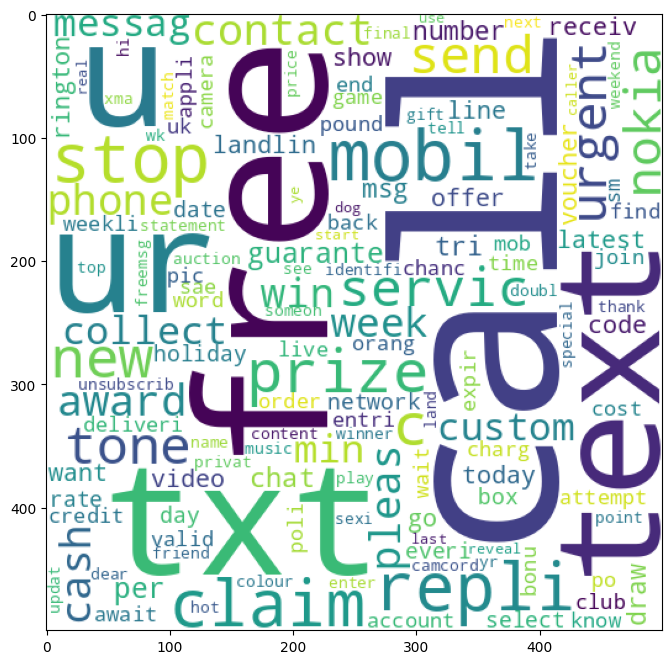

In [79]:
plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

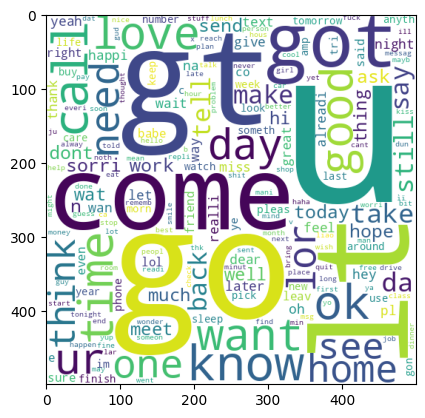

In [80]:
notspam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep =" ")) 
plt.imshow(notspam_wc)

In [81]:
spam_corpus= []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

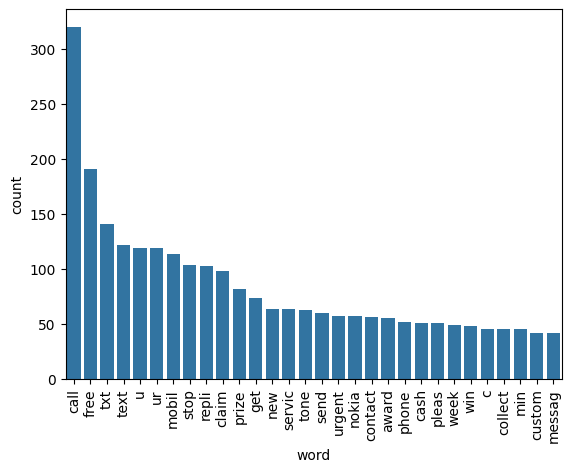

In [82]:
from collections import Counter

top_words = Counter(spam_corpus).most_common(30)
temp_df = pd.DataFrame(top_words, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()


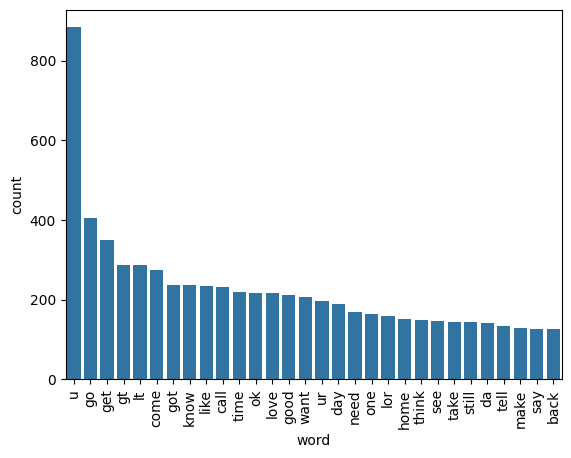

In [83]:
not_spam_corpus= []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)
top_words = Counter(not_spam_corpus).most_common(30)
temp_df = pd.DataFrame(top_words, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()


## MODEL DEVELPMENT

In [210]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#initally cv = CountVectorizer()
# 2nd improve tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [211]:
X =tfidf.fit_transform(df['transformed_text']).toarray()

In [188]:
##for improvemnt check
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [189]:
##for imporvement
#X = np.hstack((X,df['char_count'].values.reshape(-1,1)))

In [212]:
y = df['target'].values

In [213]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [214]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [193]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[792 104]
 [ 31 107]]
0.5071090047393365


In [215]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[896   0]
 [ 31 107]]
1.0


In [195]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[893   3]
 [ 20 118]]
0.9752066115702479


## TFIDF gives best precison with mnb

In [196]:
from sklearn. linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn. naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [197]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [198]:
def train_classifers(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [199]:
clfs = {
'SVC' : svc,
'KN' : knc,
'NB': mnb,
'DT': dtc,
'LR': lrc,
'RF': rfc,
}

In [200]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    curr_accuracy_score,curr_precison_score = train_classifers(clf,X_train,y_train,X_test,y_test)
    print("For ", name)
    print("Accuracy - ",curr_accuracy_score)
    print("Precision - ",curr_precison_score)

    accuracy_scores.append(curr_accuracy_score)
    precision_scores.append(curr_precison_score)



For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9119922630560928
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.8137254901960784
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9693877551020408
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9652173913043478


In [201]:
perf_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Acuuracy' : accuracy_scores,
    "Precision": precision_scores
})

In [202]:
perf_df

,Algorithm,Acuuracy,Precision
0,SVC,0.972921,0.974138
1,KN,0.911992,1.000000
2,NB,0.970019,1.000000
3,DT,0.928433,0.813725
4,LR,0.955513,0.969388
5,RF,0.970019,0.965217


### IMPOROVING THE MODEL

intianlly used count vectorizer<br>
then tfidf used <br>
now using max_feature parameter with diff values and 3000 giving better <br>
reult in mnb with more accuracy<br>
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer<br>
initally cv = CountVectorizer()<br>
2nd improve tfidf = TfidfVectorizer()<br>
tfidf = TfidfVectorizer(max_features=3000)<br>

In [203]:
perf_df['accuracy_max_3000'] = accuracy_scores
perf_df['precison_max_3000'] = precision_scores

In [204]:
perf_df

,Algorithm,Acuuracy,Precision,accuracy_max_3000,precison_max_3000
0,SVC,0.972921,0.974138,0.972921,0.974138
1,KN,0.911992,1.000000,0.911992,1.000000
2,NB,0.970019,1.000000,0.970019,1.000000
3,DT,0.928433,0.813725,0.928433,0.813725
4,LR,0.955513,0.969388,0.955513,0.969388
5,RF,0.970019,0.965217,0.970019,0.965217


In [205]:
perf_df['accuracy_scaled'] = accuracy_scores
perf_df['precison_scaled'] = precision_scores

In [206]:
perf_df

,Algorithm,Acuuracy,Precision,accuracy_max_3000,precison_max_3000,accuracy_scaled,precison_scaled
0,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
1,KN,0.911992,1.000000,0.911992,1.000000,0.911992,1.000000
2,NB,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000
3,DT,0.928433,0.813725,0.928433,0.813725,0.928433,0.813725
4,LR,0.955513,0.969388,0.955513,0.969388,0.955513,0.969388
5,RF,0.970019,0.965217,0.970019,0.965217,0.970019,0.965217


In [207]:
perf_df['accuracy_with char_count'] = accuracy_scores
perf_df['precison_with char_count'] = precision_scores

In [208]:
perf_df

,Algorithm,Acuuracy,Precision,accuracy_max_3000,precison_max_3000,accuracy_scaled,precison_scaled,accuracy_with char_count,precison_with char_count
0,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
1,KN,0.911992,1.000000,0.911992,1.000000,0.911992,1.000000,0.911992,1.000000
2,NB,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000
3,DT,0.928433,0.813725,0.928433,0.813725,0.928433,0.813725,0.928433,0.813725
4,LR,0.955513,0.969388,0.955513,0.969388,0.955513,0.969388,0.955513,0.969388
5,RF,0.970019,0.965217,0.970019,0.965217,0.970019,0.965217,0.970019,0.965217


In [209]:
##voting classifire
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
knc = KNeighborsClassifier()

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('kn',knc)])



In [180]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [182]:
y_pred = voting.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9700193423597679
1.0


In [ ]:
#Applying stacking
#estimators=[('svm',svc),('nb',mnb),('kn',knc)]
#final_estimator=LogisticRegression(solver='liblinear')

#from sklearn.ensemble import StackingClassifier

#clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
#print("Accuracy", accuracy_score(y_test,y_pred))
#print("Precision", precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.975


In [218]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
